<a href="https://colab.research.google.com/github/Anik-1802021/ML-autoencoder-denoiseing-/blob/main/Denoise_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

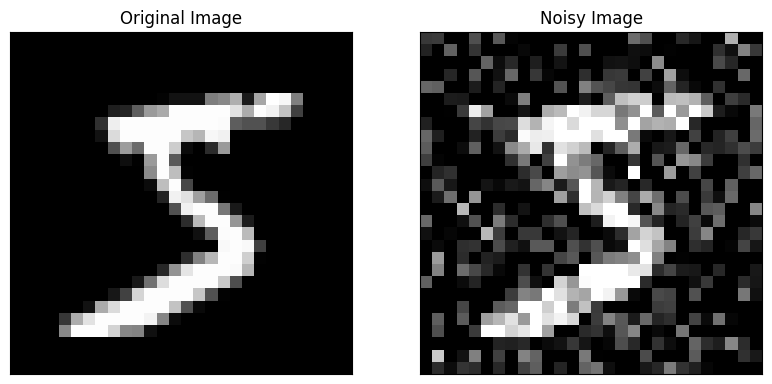

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_11 (Ba  (None, 14, 14, 64)       

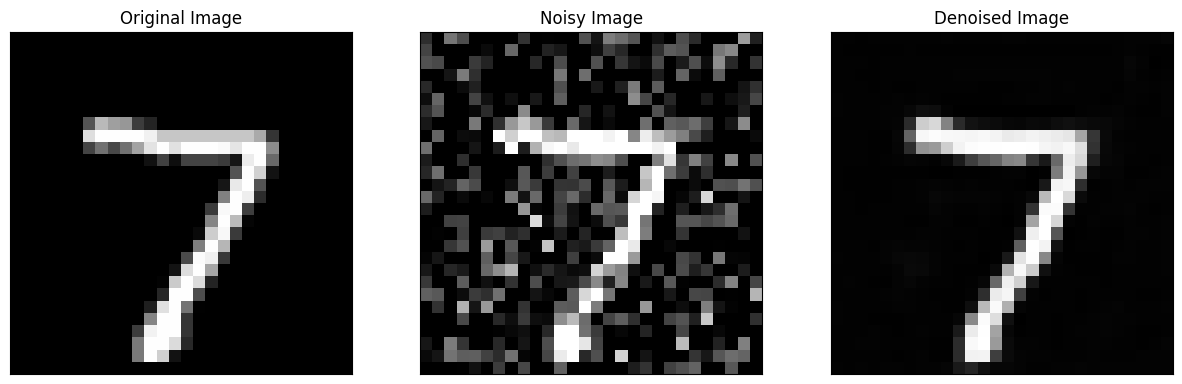

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda, Reshape, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model, Sequential
from keras import backend as K
from keras.datasets import mnist
from keras.optimizers import legacy

# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing and reshaping the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Adding noise to the data
noise_factor = 0.3  # Adjusted noise factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Displaying original, noisy, and denoised images
n = 1
plt.figure(figsize=(15, 5))
for i in range(n):
    # Display original image
    ax = plt.subplot(1, 3, 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title('Original Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title('Noisy Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Building the denoising model
input_shape = (28, 28, 1)
denoise = Sequential()
denoise.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))  # Increased filters
denoise.add(BatchNormalization())
denoise.add(Activation('relu'))
denoise.add(MaxPooling2D(pool_size=(2, 2)))
denoise.add(Conv2D(64, (3, 3), padding='same'))  # Increased filters
denoise.add(BatchNormalization())
denoise.add(Activation('relu'))
denoise.add(UpSampling2D(size=(2, 2)))
denoise.add(Conv2D(32, (3, 3), padding='same'))
denoise.add(BatchNormalization())
denoise.add(Activation('relu'))
denoise.add(Conv2D(1, (3, 3), padding='same'))
denoise.add(BatchNormalization())
denoise.add(Activation('sigmoid'))

# Compiling the model
learning_rate = 0.01  # Adjusted learning rate
decay_rate = 1e-6  # Adjusted decay rate
momentum = 0.9
sgd = legacy.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
denoise.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
denoise.summary()

# Training the model
denoise.fit(x_train_noisy, x_train, epochs=20, batch_size=128, verbose=1)  # Adjusted epochs and batch size

# Predicting on the noisy images
denoised_images = denoise.predict(x_test_noisy)

# Displaying original, noisy, and denoised images
plt.figure(figsize=(15, 5))
for i in range(n):
    # Display original image
    ax = plt.subplot(1, 3, 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title('Original Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title('Noisy Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised image
    ax = plt.subplot(1, 3, 3)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.set_title('Denoised Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
